In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import functools
%matplotlib inline

## Read in data
Source EDA-prepare-data.ipynb, clean_taxons.py, clean_content.py

In [2]:
untagged = pd.read_csv('../../data/untagged_content.csv')
labelled = pd.read_csv('../../data/labelled.csv')
filtered = pd.read_csv('../../data/filtered.csv')
taxons = pd.read_csv('../../data/taxons_cleaner.csv')

In [3]:
#convert string dates to timestamp for time series analyses (see below)
print(type(untagged['first_published_at'][0]))
untagged['first_published_at'] = pd.to_datetime(untagged['first_published_at'])
print(type(untagged['first_published_at'][0]))

<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>


In [4]:
#use timestamp as index in untagged data for plots
untagged.index = untagged['first_published_at'] 

# Taxons

In [5]:
#Count taxons by level1 and level2
mask = taxons['level1taxon'].notnull() & taxons['level2taxon'].isnull()

print("There are {} out of {} taxons with a level2"
      .format(sum(taxons['level2taxon'].notnull()), taxons.shape[0]))
print("There are {} out of {} taxons with a level1 tag, but no level2 tag"
      .format(sum(mask), taxons.shape[0]))

There are 2008 out of 2027 taxons with a level2
There are 19 out of 2027 taxons with a level1 tag, but no level2 tag


### How many taxons at each level?

In [6]:
level1_only = taxons[taxons['level1taxon'].notnull() & taxons['level2taxon'].isnull()]
level2_only = taxons[taxons['level2taxon'].notnull() & taxons['level3taxon'].isnull()]
level3_only = taxons[taxons['level3taxon'].notnull() & taxons['level4taxon'].isnull()]
level4_only = taxons[taxons['level4taxon'].notnull() & taxons['level5taxon'].isnull()]
level5_only = taxons[taxons['level5taxon'].notnull()]

print("Number of taxons at level1 = {}".format(level1_only.shape[0]))
print("Number of taxons at level2 = {}".format(level2_only.shape[0]))
print("Number of taxons at level3 = {}".format(level3_only.shape[0]))
print("Number of taxons at level4 = {}".format(level4_only.shape[0]))
print("Number of taxons at level5 = {}".format(level5_only.shape[0]))

Number of taxons at level1 = 19
Number of taxons at level2 = 217
Number of taxons at level3 = 687
Number of taxons at level4 = 882
Number of taxons at level5 = 222


### How many content items at each level?

In [7]:
level1_only = filtered[filtered['level1taxon'].notnull() & filtered['level2taxon'].isnull()]
level2_only = filtered[filtered['level2taxon'].notnull() & filtered['level3taxon'].isnull()]
level3_only = filtered[filtered['level3taxon'].notnull() & filtered['level4taxon'].isnull()]
level4_only = filtered[filtered['level4taxon'].notnull() & filtered['level5taxon'].isnull()]
level5_only = filtered[filtered['level5taxon'].notnull()]

print("Number of times content items tagged to level1 = {}".format(level1_only.shape[0]))
print("Number of times content items tagged to level2 = {}".format(level2_only.shape[0]))
print("Number of times content items tagged to level3 = {}".format(level3_only.shape[0]))
print("Number of times content items tagged to level4 = {}".format(level4_only.shape[0]))
print("Number of times content items tagged to level5 = {}".format(level5_only.shape[0]))
print("")
print("Number of unique content items tagged to level1 = {}".format(level1_only.content_id.nunique()))
print("Number of unique content items tagged to level2 = {}".format(level2_only.content_id.nunique()))
print("Number of unique content items tagged to level3 = {}".format(level3_only.content_id.nunique()))
print("Number of unique content items tagged to level4 = {}".format(level4_only.content_id.nunique()))
print("Number of unique content items tagged to level5 = {}".format(level5_only.content_id.nunique()))

Number of times content items tagged to level1 = 32034
Number of times content items tagged to level2 = 128372
Number of times content items tagged to level3 = 54732
Number of times content items tagged to level4 = 11942
Number of times content items tagged to level5 = 2004

Number of unique content items tagged to level1 = 30125
Number of unique content items tagged to level2 = 89081
Number of unique content items tagged to level3 = 45240
Number of unique content items tagged to level4 = 9926
Number of unique content items tagged to level5 = 1639


### Number of tags per content level, overall 

In [8]:
times_tagged_filtered=filtered.groupby('content_id').size().sort_values(ascending=True)
filtered.groupby('content_id').size().sort_values(ascending=True).describe()

count    127320.000000
mean          1.799277
std           1.202716
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          41.000000
dtype: float64

In [20]:
print("The percent of filtered content tagged more to more than 2 taxons ={}".format(len(times_tagged_filtered[times_tagged_filtered>2])/len(times_tagged_filtered)*100))

The percent of filtered content tagged more to more than 2 taxons =18.069431354068488


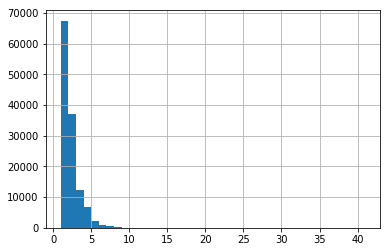

In [13]:
times_tagged_filtered.hist(bins=40)

In [14]:
times_tagged_labelled=labelled.groupby('content_id').size().sort_values(ascending=True)
labelled.groupby('content_id').size().sort_values(ascending=True).describe()

count    128577.000000
mean          1.805525
std           1.219718
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          63.000000
dtype: float64

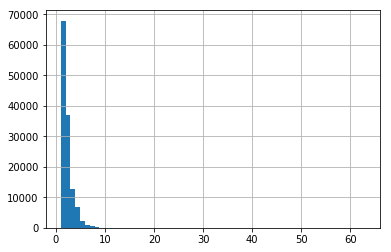

In [15]:
times_tagged_labelled.hist(bins=63)

In [21]:
print("The percent of labelled content tagged more to more than 2 taxons ={}".format(len(times_tagged_labelled[times_tagged_labelled>2])/len(times_tagged_labelled)*100))

The percent of labelled content tagged more to more than 2 taxons =18.475310514322157


In [32]:
len(times_tagged_labelled[times_tagged_labelled>2])

23755

In [30]:
#save out content tagged to more than 10 taxons
morethan10taxons=times_tagged_labelled[times_tagged_labelled>10]
morethan10taxons.to_csv('../../data/taggedtomorethan10taxons.csv', index=False)
morethan10taxons.shape

(121,)

### Number of tags per content item at each level

In [22]:
level1_only.groupby('content_id').size().sort_values(ascending=True).describe()

count    30125.000000
mean         1.063369
std          0.250350
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
dtype: float64

In [23]:
level2_only.groupby('content_id').size().sort_values(ascending=True).describe()

count    89081.000000
mean         1.441070
std          0.821392
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         35.000000
dtype: float64

In [24]:
level3_only.groupby('content_id').size().sort_values(ascending=True).describe()

count    45240.000000
mean         1.209814
std          0.607367
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
dtype: float64

In [25]:
level4_only.groupby('content_id').size().sort_values(ascending=True).describe()

count    9926.000000
mean        1.203103
std         0.499122
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
dtype: float64

In [26]:
level5_only.groupby('content_id').size().sort_values(ascending=True).describe()

count    1639.000000
mean        1.222697
std         0.542299
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
dtype: float64

## Level1  taxons

Expecting 19 top taxons (plus `None`)

In [34]:
assert filtered.level1taxon.nunique() == 19

print("There are {} unique taxon names in the level 1 taxon"
      .format(filtered.level1taxon.nunique()))

set(filtered.level1taxon)

There are 19 unique taxon names in the level 1 taxon


{'Business',
 'Crime, justice and law',
 'Defence',
 'Education, training and skills',
 'Entering and staying in the UK',
 'Environment',
 'Going and being abroad',
 'Government',
 'Health and social care',
 'Housing, local and community',
 'International',
 'Life circumstances',
 'Money',
 "Parenting, childcare and children's services ",
 'Regional and local government',
 'Society and culture',
 'Transport',
 'Welfare',
 'Work'}

In [35]:
topfreq = filtered.groupby('level1taxon').size()
topfreq.sort_values(ascending=False)

level1taxon
Business                                         48397
Environment                                      29199
Government                                       23809
Society and culture                              15476
Health and social care                           14886
Money                                            13722
International                                    13409
Housing, local and community                     10637
Defence                                          10363
Crime, justice and law                            9998
Education, training and skills                    9790
Regional and local government                     9065
Transport                                         8468
Work                                              5132
Welfare                                           3164
Going and being abroad                            1841
Parenting, childcare and children's services      1122
Entering and staying in the UK                     31

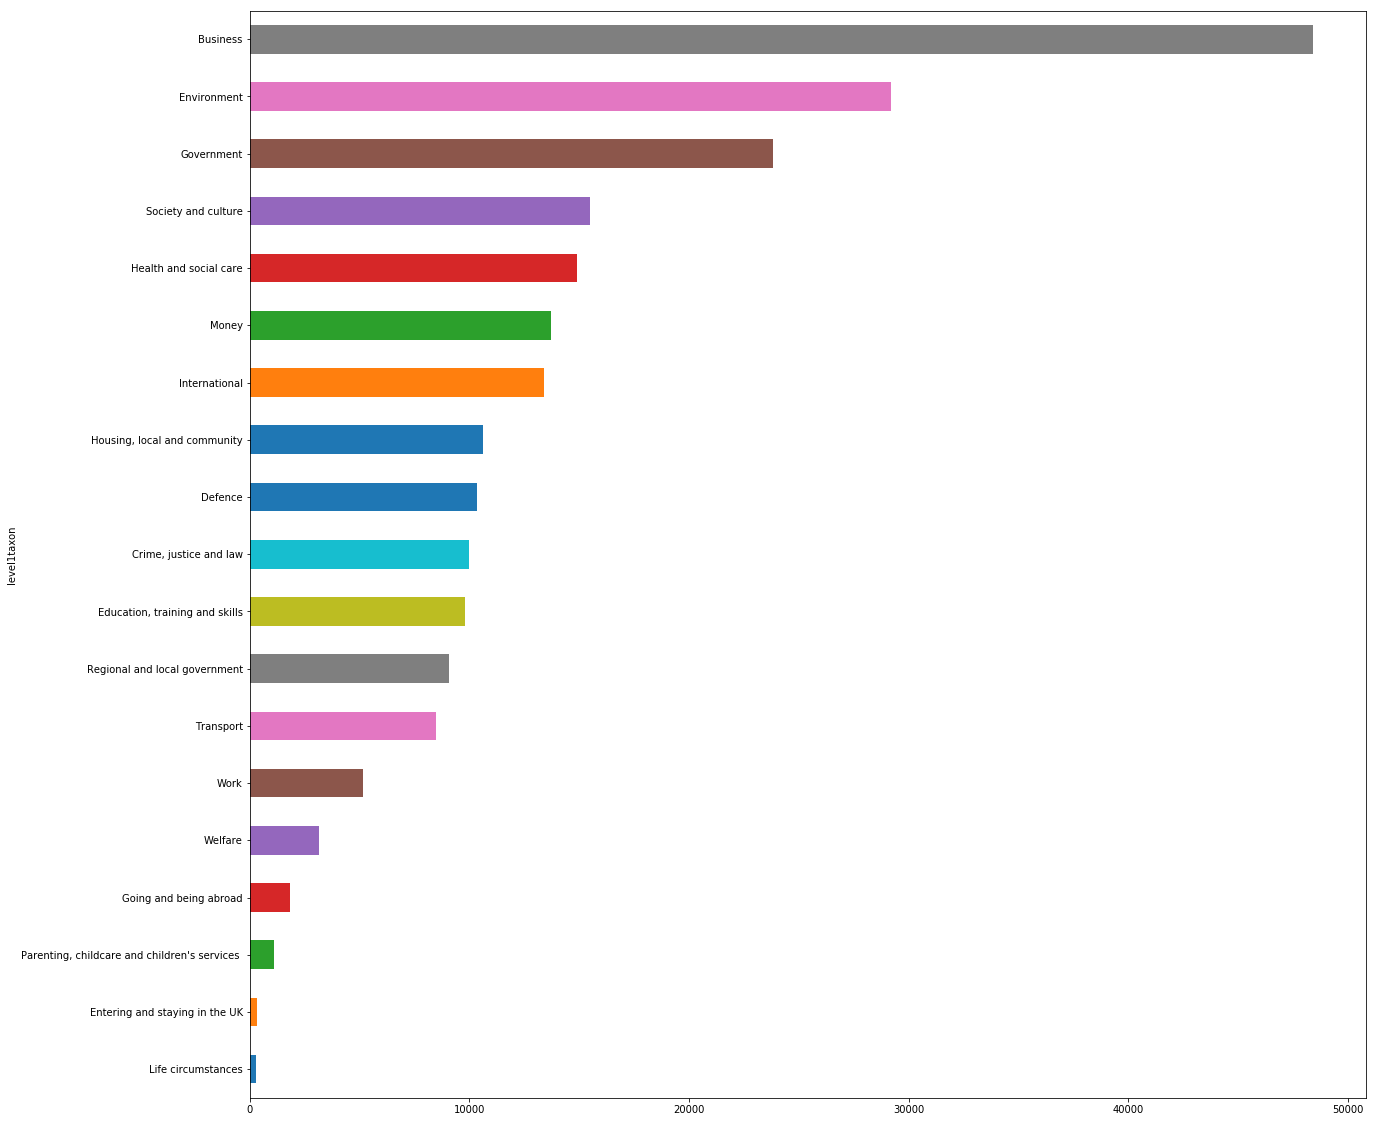

In [36]:
topfreq.sort_values().plot(kind = 'barh', figsize=(20, 20))

Formally, Kendall's τ coefficient is defined as:

$${\tau ={\frac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{N(N-1)/2}}}$$

In [ ]:
level1_counts= filtered.groupby(['content_id', 'level1taxon']).size().unstack(fill_value=0)
level1_corr=level1_counts.corr(method = "kendall")

In [49]:
level1_corr

#c = df.corr().abs()

s = level1_corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

so

level1taxon                                    level1taxon                                  
Work                                           Work                                             1.000000
Health and social care                         Health and social care                           1.000000
Society and culture                            Society and culture                              1.000000
Regional and local government                  Regional and local government                    1.000000
Parenting, childcare and children's services   Parenting, childcare and children's services     1.000000
Money                                          Money                                            1.000000
Life circumstances                             Life circumstances                               1.000000
International                                  International                                    1.000000
Government                                     Government          

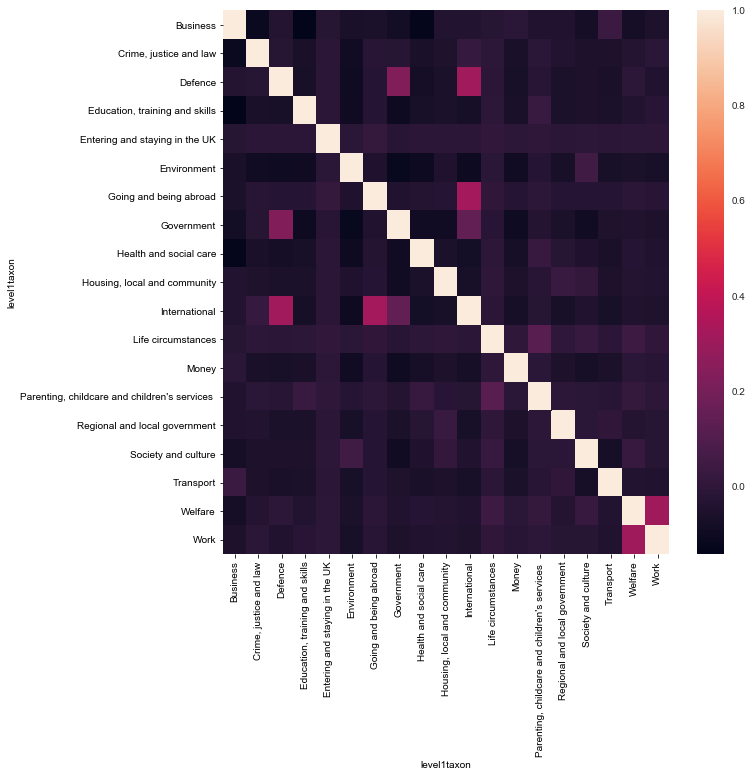

In [37]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(level1_corr, 
        xticklabels=level1_corr.columns,
        yticklabels=level1_corr.columns)

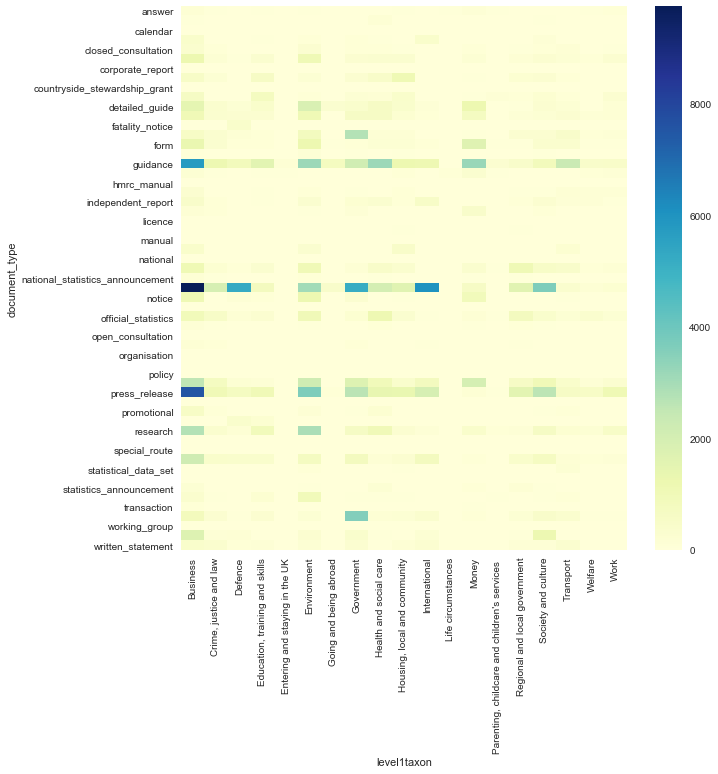

In [38]:
top_doctype = pd.crosstab(filtered['document_type'], filtered['level1taxon'])
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(top_doctype, cmap = "YlGnBu")

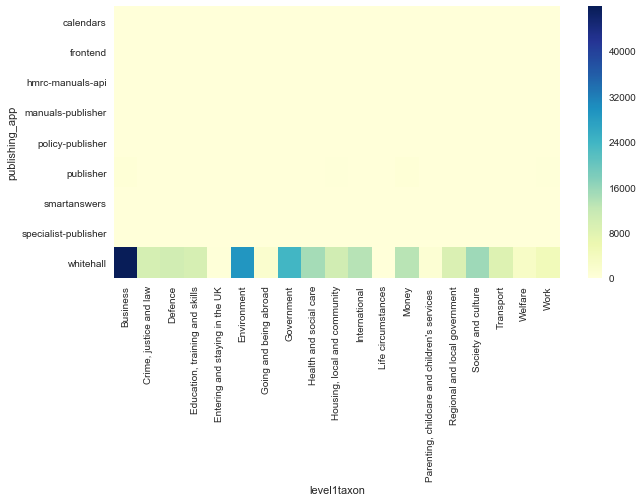

In [39]:
top_pubapp = pd.crosstab(filtered['publishing_app'], filtered['level1taxon'])
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(top_pubapp, cmap = "YlGnBu")

In [40]:
filtered.groupby('level1taxon').size().sort_values(ascending=False)

level1taxon
Business                                         48397
Environment                                      29199
Government                                       23809
Society and culture                              15476
Health and social care                           14886
Money                                            13722
International                                    13409
Housing, local and community                     10637
Defence                                          10363
Crime, justice and law                            9998
Education, training and skills                    9790
Regional and local government                     9065
Transport                                         8468
Work                                              5132
Welfare                                           3164
Going and being abroad                            1841
Parenting, childcare and children's services      1122
Entering and staying in the UK                     31

### Level 2 taxons

In [ ]:
#assert content_taxons_dedup.level2taxon.nunique() == 103

print("There are {} unique taxon names in the level 2 taxon"
      .format(content_taxons_dedup.level2taxon.nunique()))

In [ ]:
second_freq = content_taxons_dedup.groupby('level2taxon').size().sort_values(ascending=False)

# Print as string to get around truncation

print(second_freq.to_string())



In [ ]:
second_freq.sort_values().plot(kind = 'barh', figsize=(10,30), fontsize=8)

In [ ]:
level2_counts= content_taxons_dedup.groupby(['content_id', 'level2taxon']).size().unstack(fill_value=0)
level2_corr=level2_counts.corr(method = "kendall")

# plot the heatmap
# fig, ax = plt.subplots(figsize=(20,20))
# sns.set(font_scale=0.4)
# sns.heatmap(level2_corr, 
#         xticklabels=level2_corr.columns,
#         yticklabels=level2_corr.columns)

### Mutually exclusive taxon combinations (level1 and level2)

In [60]:
#Only keep rows where level1/level2 combination is unique
level2_dedup = labelled.drop_duplicates(subset = ['content_id', 'level1taxon', 'level2taxon']).copy()
#Identify and drop rows where level2 is missing
mask= pd.notnull(level2_dedup['level2taxon'])
level2_tagged = level2_dedup[mask]

In [61]:
#concatenate the name of each level2taxon for a single content item
level2_tagged = level2_tagged.groupby('content_id')['level2taxon'].apply('-;-'.join).reset_index()
print("there are {} mutually exclusive combinations of level2 taxon combinations.".format(level2_tagged.level2taxon.nunique()))

there are 4915 mutually exclusive combinations of level2 taxon combinations.


There are 130 mutually exclusive combinations of level2 taxon combinations populated with more than 100 content items


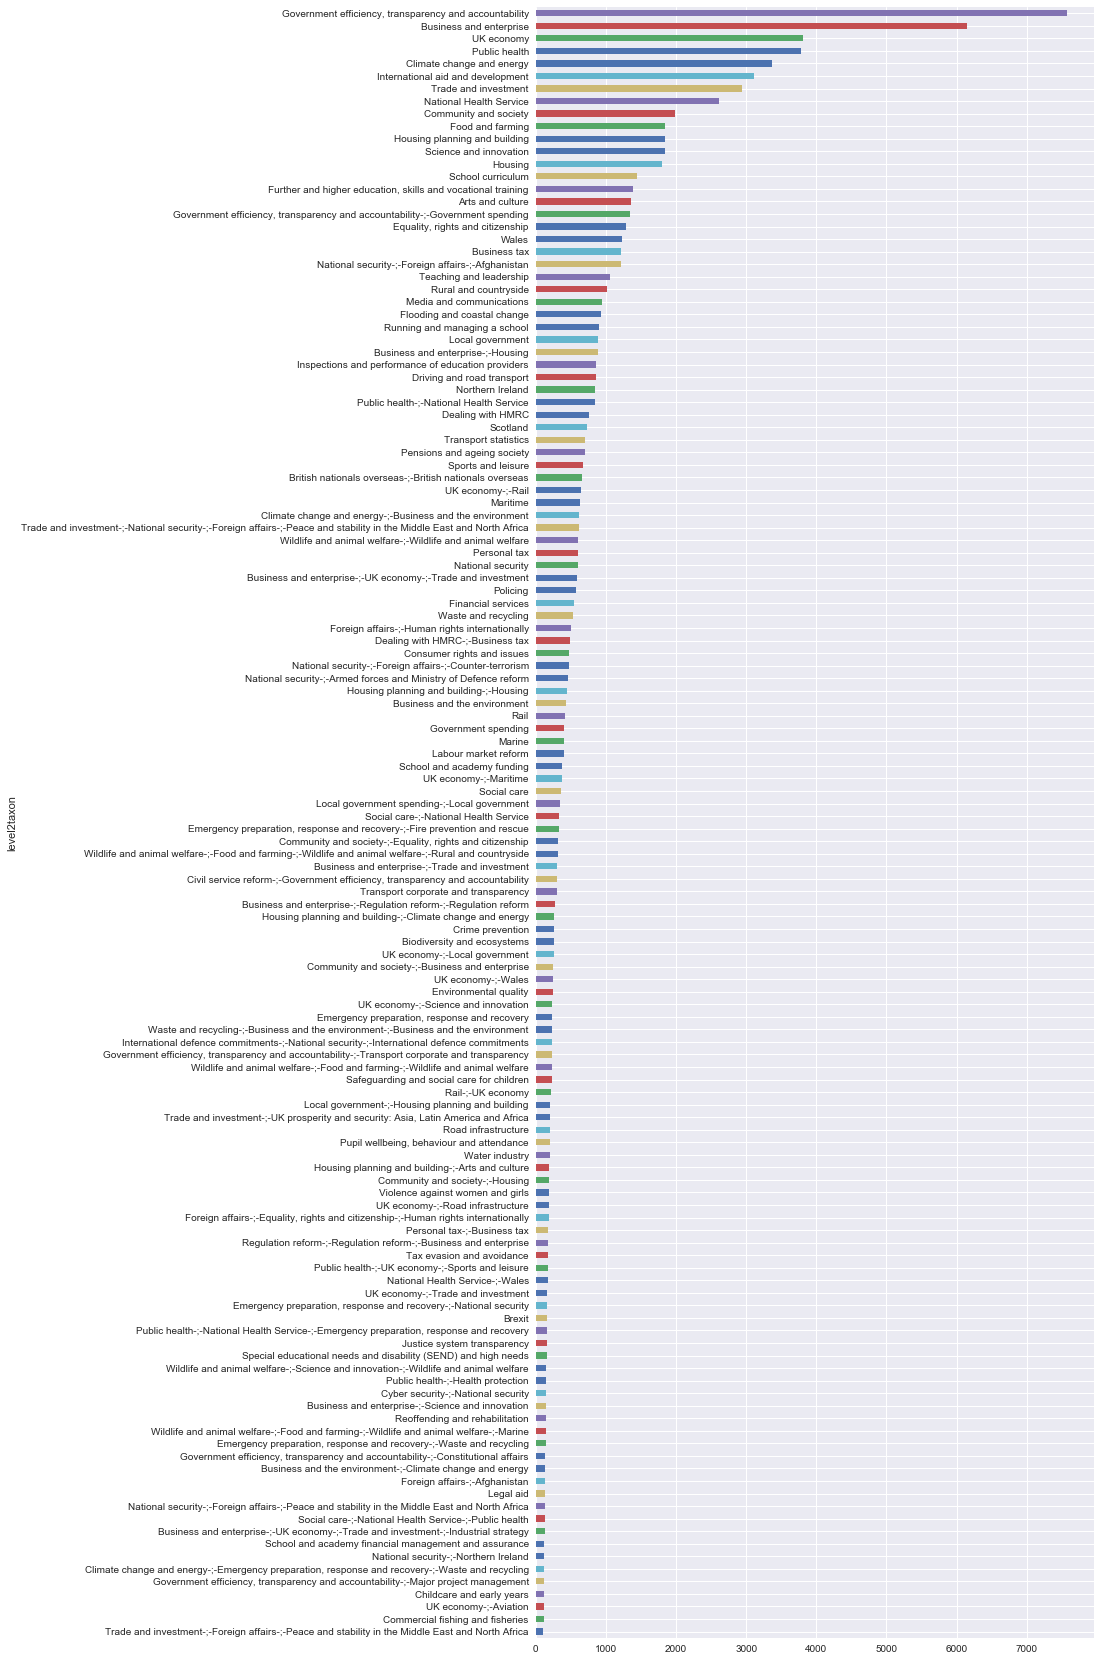

In [66]:
inline_rc = dict(mpl.rcParams)
#Get frequency counts for each of the mutually exclusive taxon2 combinations
mutualex_freq = level2_tagged.groupby('level2taxon').size().sort_values(ascending=True)

#Keep those with higher frequency
mutualex_freq_top = mutualex_freq[mutualex_freq > 100]
print("There are {} mutually exclusive combinations of level2 taxon combinations populated with more than 100 content items".format(len(mutualex_freq_top)))

mutualex_freq_top.plot(kind = 'barh', figsize=(10,30))

In [ ]:
# Print as string to get around truncation

print(mutualex_freq.to_string())